In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Obter o caminho do diretório atual
current_dir = os.getcwd()

# Construir o caminho completo para o arquivo CSV
dt1_file = os.path.join(current_dir, "Real_Estate_Sales_2001-2022_GL.csv")

# Ler os dados do CSV
dt1_data = pd.read_csv(dt1_file)

In [3]:
dt1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [4]:
dt1_data.shape

(1097629, 14)

In [5]:
dt1_data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [6]:
# Limpeza inicial dos dados: Remover colunas com muitos valores ausentes e renomear colunas para facilitar a análise
columns_to_drop = ["Non Use Code", "Assessor Remarks", "OPM remarks", "Location"]
data_cleaned = dt1_data.drop(columns=columns_to_drop)

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 83.7+ MB


In [8]:
# Renomeando colunas para padronizar e facilitar o trabalho
data_cleaned.rename(columns={
    "Serial Number": "Serial_Number",
    "List Year": "List_Year",
    "Date Recorded": "Date_Recorded",
    "Assessed Value": "Assessed_Value",
    "Sale Amount": "Sale_Amount",
    "Sales Ratio": "Sales_Ratio",
    "Property Type": "Property_Type",
    "Residential Type": "Residential_Type"
}, inplace=True)

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial_Number     1097629 non-null  int64  
 1   List_Year         1097629 non-null  int64  
 2   Date_Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed_Value    1097629 non-null  float64
 6   Sale_Amount       1097629 non-null  float64
 7   Sales_Ratio       1097629 non-null  float64
 8   Property_Type     715183 non-null   object 
 9   Residential_Type  699240 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 83.7+ MB


In [10]:
# Verificar valores nulos nas colunas principais
missing_data = data_cleaned.isnull().sum()
print(missing_data)

Serial_Number            0
List_Year                0
Date_Recorded            2
Town                     0
Address                 51
Assessed_Value           0
Sale_Amount              0
Sales_Ratio              0
Property_Type       382446
Residential_Type    398389
dtype: int64


In [11]:
# Exibir amostra dos dados limpos e estatísticas de valores ausentes
data_cleaned.head(), missing_data

(   Serial_Number  List_Year Date_Recorded     Town           Address  \
 0         220008       2022    01/30/2023  Andover       618 ROUTE 6   
 1        2020348       2020    09/13/2021  Ansonia   230 WAKELEE AVE   
 2          20002       2020    10/02/2020  Ashford   390 TURNPIKE RD   
 3         210317       2021    07/05/2022     Avon   53 COTSWOLD WAY   
 4         200212       2020    03/09/2021     Avon  5 CHESTNUT DRIVE   
 
    Assessed_Value  Sale_Amount  Sales_Ratio Property_Type Residential_Type  
 0        139020.0     232000.0       0.5992   Residential    Single Family  
 1        150500.0     325000.0       0.4630    Commercial              NaN  
 2        253000.0     430000.0       0.5883   Residential    Single Family  
 3        329730.0     805000.0       0.4096   Residential    Single Family  
 4        130400.0     179900.0       0.7248   Residential            Condo  ,
 Serial_Number            0
 List_Year                0
 Date_Recorded            2
 Town  

In [12]:
# Verificando se os dados estão realmente limpos
dt1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [13]:
# Verificando se os dados estão realmente limpos
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial_Number     1097629 non-null  int64  
 1   List_Year         1097629 non-null  int64  
 2   Date_Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed_Value    1097629 non-null  float64
 6   Sale_Amount       1097629 non-null  float64
 7   Sales_Ratio       1097629 non-null  float64
 8   Property_Type     715183 non-null   object 
 9   Residential_Type  699240 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 83.7+ MB


In [14]:
# Atualizando o arquivo CSV com a limpeza de dados
data_cleaned.to_csv('Real_Estate_Sales_2001-2022_GL.csv.', 
          index=False,           # Não salvar o índice
          sep=',',               # Separador de colunas (padrão é vírgula)
          encoding='utf-8')      # Especificar a codificação

In [15]:
data_cleaned.describe()

,Serial_Number,List_Year,Assessed_Value,Sale_Amount,Sales_Ratio
count,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06
mean,5.370357e+05,2.011218e+03,2.818016e+05,4.053146e+05,9.603926e+00
std,7.526074e+06,6.773485e+00,1.657890e+06,5.143492e+06,1.801664e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.071300e+04,2.005000e+03,8.909000e+04,1.450000e+05,4.778667e-01
50%,8.070600e+04,2.011000e+03,1.405800e+05,2.330000e+05,6.105663e-01
75%,1.703410e+05,2.018000e+03,2.282700e+05,3.750000e+05,7.707200e-01
max,2.000500e+09,2.022000e+03,8.815100e+08,5.000000e+09,1.226420e+06


In [81]:
media_valores_avaliados = data_cleaned['Assessed_Value'].mean()
print("Media dos valores avaliados: ", media_valores_avaliados)
media_valor_venda = data_cleaned['Sale_Amount'].mean()
print("O valor médio de venda: ", media_valor_venda)
media_proporcao_vendas = data_cleaned['Sales_Ratio'].mean()
print("A proporção de venda: ", media_proporcao_vendas)

Media dos valores avaliados:  281801.57861719216
O valor médio de venda:  405314.55976191396
A proporção de venda:  9.60392605270479


In [86]:
media_valores_avaliados = data_cleaned['Assessed_Value'].mean()
print("Media dos valores avaliados: R${:,.2f}".format(media_valores_avaliados))
media_valor_venda = data_cleaned['Sale_Amount'].mean()
print("O valor médio de venda: R${:,.2f}".format(media_valor_venda))
media_proporcao_vendas = data_cleaned['Sales_Ratio'].median()
print("A proporção de vendas: {:.2f}".format(media_proporcao_vendas))

Media dos valores avaliados: R$281,801.58
O valor médio de venda: R$405,314.56
A proporção de vendas: 0.61


In [87]:
# Perguntas:
# Qual é a tendência anual no número de vendas?
# Quais cidades têm os maiores valores médios de venda?
# Como os valores de venda variam por tipo de propriedade?
# Qual é a relação entre valores avaliados e de venda ao longo do tempo?
# Quais os tipos de residência mais frequentes nas vendas?

In [88]:
# Tratar valores ausentes: preencher 'Property_Type' e 'Residential_Type' com "Desconhecido"
data_cleaned["Property_Type"].fillna("Desconhecido", inplace=True)
data_cleaned["Residential_Type"].fillna("Desconhecido", inplace=True)

In [100]:
# Mostrar os valores desconhecidos e sua quantidade total
data_cleaned["Property_Type"].value_counts()

Property_Type
Single Family     401612
Desconhecido      382446
Residential       151064
Condo             105420
Two Family         26408
Three Family       12586
Vacant Land         7824
Commercial          5987
Four Family         2150
Apartments          1327
Industrial           795
Public Utility        10
Name: count, dtype: int64

In [101]:
# Mostrar os valores desconhecidos e sua quantidade total
data_cleaned["Residential_Type"].value_counts()

Residential_Type
Single Family    508044
Desconhecido     398389
Condo            136822
Two Family        34848
Three Family      16567
Four Family        2959
Name: count, dtype: int64

In [111]:
# Remover registros com valores ausentes em colunas críticas
data_cleaned.dropna(subset=["Date_Recorded", "Address"], inplace=True)
data_cleaned.isnull().sum ()

Serial_Number       0
List_Year           0
Date_Recorded       0
Town                0
Address             0
Assessed_Value      0
Sale_Amount         0
Sales_Ratio         0
Property_Type       0
Residential_Type    0
dtype: int64

In [112]:
# Confirmar que os dados estão prontos para análise
missing_data_after_cleaning = data_cleaned.isnull().sum()
missing_data_after_cleaning

Serial_Number       0
List_Year           0
Date_Recorded       0
Town                0
Address             0
Assessed_Value      0
Sale_Amount         0
Sales_Ratio         0
Property_Type       0
Residential_Type    0
dtype: int64

In [119]:
stats = data_cleaned.describe()
data_cleaned.head(), missing_data_after_cleaning, stats

(   Serial_Number  List_Year Date_Recorded     Town          Address  \
 0        2020177       2020    04/14/2021  Ansonia    323 BEAVER ST   
 1        2020225       2020    05/26/2021  Ansonia   152 JACKSON ST   
 2        2020348       2020    09/13/2021  Ansonia  230 WAKELEE AVE   
 3        2020090       2020    12/14/2020  Ansonia      57 PLATT ST   
 4         200500       2020    09/07/2021     Avon     245 NEW ROAD   
 
    Assessed_Value  Sale_Amount  Sales_Ratio Property_Type Residential_Type  
 0        133000.0     248400.0       0.5354   Residential    Single Family  
 1        110500.0     239900.0       0.4606   Residential     Three Family  
 2        150500.0     325000.0       0.4630    Commercial     Desconhecido  
 3        127400.0     202500.0       0.6291   Residential       Two Family  
 4        217640.0     400000.0       0.5441   Residential    Single Family  ,
 Serial_Number       0
 List_Year           0
 Date_Recorded       0
 Town                0
 Addr

In [122]:
# Converter a coluna Date_Recorded para datetime e extrair o ano
data_cleaned["Date_Recorded"] = pd.to_datetime(data_cleaned["Date_Recorded"], errors="coerce")
data_cleaned["Year_Recorded"] = data_cleaned["Date_Recorded"].dt.year
# Mostrar as mudanças no ano
data_cleaned

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Year_Recorded
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,2021
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,2021
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Desconhecido,2021
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,2020
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,2021
...,...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,2022-10-11,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family,2022
1097625,220369,2022,2023-09-29,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family,2023
1097626,2200470,2022,2023-01-09,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo,2023
1097627,22396,2022,2023-09-26,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family,2023


In [126]:
# Pergunta 1: Tendência anual no número de vendas
annual_sales = data_cleaned["Year_Recorded"].value_counts().sort_index()

Text(0, 0.5, 'Número de Vendas')

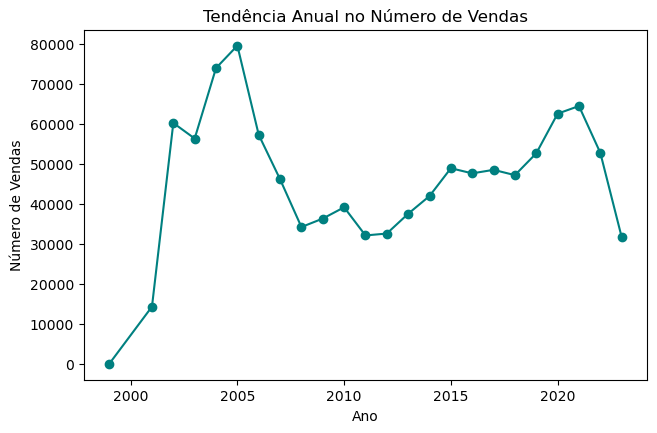

In [142]:
# Gráfico 1: Tendência anual no número de vendas
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
annual_sales.plot(kind="line", marker="o", color="teal")
plt.title("Tendência Anual no Número de Vendas")
plt.xlabel("Ano")
plt.ylabel("Número de Vendas")

In [135]:
# Pergunta 2: Cidades com maiores valores médios de venda
city_avg_sale = data_cleaned.groupby("Town")["Sale_Amount"].mean().sort_values(ascending=False).head(10)

Text(0, 0.5, 'Valor Médio de Venda')

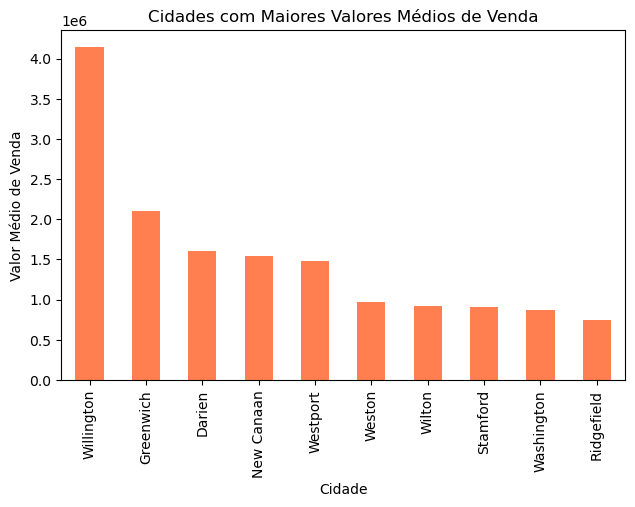

In [143]:
# Gráfico 2: Cidades com maiores valores médios de venda
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 2)
city_avg_sale.plot(kind="bar", color="coral")
plt.title("Cidades com Maiores Valores Médios de Venda")
plt.xlabel("Cidade")
plt.ylabel("Valor Médio de Venda")

In [140]:
# Pergunta 3: Valores de venda por tipo de propriedade
property_avg_sale = data_cleaned.groupby("Property_Type")["Sale_Amount"].mean()

Text(0, 0.5, 'Valor Médio de Venda')

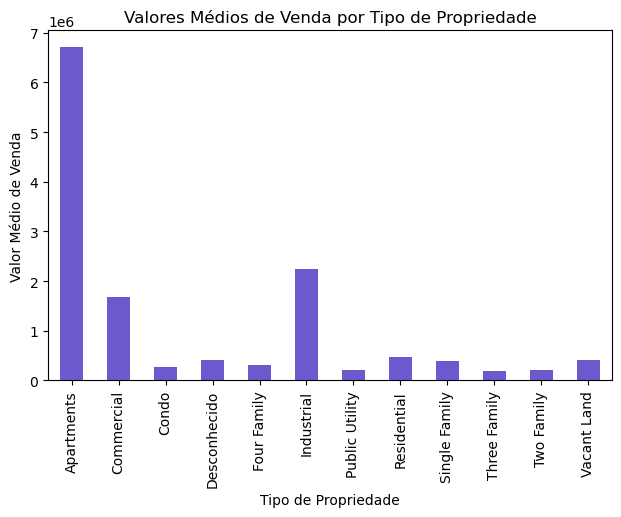

In [147]:
# Gráfico 3: Valores de venda por tipo de propriedade
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 3)
property_avg_sale.plot(kind="bar", color="slateblue")
plt.title("Valores Médios de Venda por Tipo de Propriedade")
plt.xlabel("Tipo de Propriedade")
plt.ylabel("Valor Médio de Venda")

In [149]:
# Pergunta 4: Relação entre valores avaliados e valores de venda
# (Usar uma amostra para visualização mais limpa)
scatter_sample = data_cleaned.sample(5000, random_state=42)

Text(0, 0.5, 'Valor de Venda')

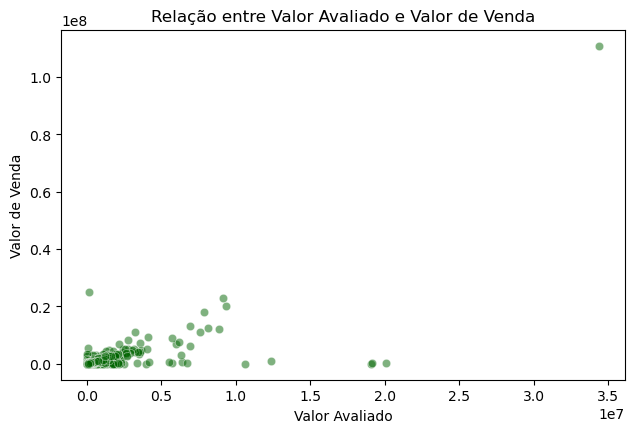

In [152]:
# Gráfico 4: Relação entre valores avaliados e de venda
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 4)
sns.scatterplot(data=scatter_sample, x="Assessed_Value", y="Sale_Amount", alpha=0.5, color="darkgreen")
plt.title("Relação entre Valor Avaliado e Valor de Venda")
plt.xlabel("Valor Avaliado")
plt.ylabel("Valor de Venda")

In [156]:
# Atualizando o arquivo CSV com o tratamento de dados
data_cleaned.to_csv('Real_Estate_Sales_2001-2022_GL.csv.', 
          index=False,           # Não salvar o índice
          sep=',',               # Separador de colunas (padrão é vírgula)
          encoding='utf-8')      # Especificar a codificação

In [159]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097578 entries, 0 to 1097628
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial_Number     1097578 non-null  int64         
 1   List_Year         1097578 non-null  int64         
 2   Date_Recorded     1097578 non-null  datetime64[ns]
 3   Town              1097578 non-null  object        
 4   Address           1097578 non-null  object        
 5   Assessed_Value    1097578 non-null  float64       
 6   Sale_Amount       1097578 non-null  float64       
 7   Sales_Ratio       1097578 non-null  float64       
 8   Property_Type     1097578 non-null  object        
 9   Residential_Type  1097578 non-null  object        
 10  Year_Recorded     1097578 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(4)
memory usage: 96.3+ MB


In [160]:
data_cleaned.head()

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Year_Recorded
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,2021
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,2021
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Desconhecido,2021
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,2020
4,200500,2020,2021-09-07,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,2021
